# Content

1. [Installing pycaret](#1)
2. [Importe Libraries](#2)
3. [Load Data](#3)
4. [Model Building](#4)
5. [Model Creation](#5)
6. [Model Tuning](#6)
7. [Model Analysis](#7)
8. [Model Prediction](#8)
9. [Save the Model](#9)

## 1. Installing pycaret<a name = 1></a>

In [ ]:
! pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 38.9 MB/s eta 0

## 2. Import Libraries<a name = 2></a>

In [ ]:
import pandas as pd
from pycaret.classification import *
import shap

## 3. Load Data<a name = 3></a>

In [ ]:
df = pd.read_csv('diabetes_clean_scaled.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.842406,0.968697,-0.019559,0.740160,1.377079,0.270163,0.852460,1.399009,1
1,-0.849975,-1.474492,-0.593325,0.045089,-1.289791,-0.917294,-0.182884,0.121670,0
2,1.246532,1.750139,-0.783908,0.233018,0.795782,-1.556530,0.972625,0.226764,1
3,-0.849975,-1.254536,-0.593325,-0.679244,-0.628768,-0.645419,-1.343867,-1.474295,0
4,-1.592118,0.654682,-1.919628,0.740160,0.471166,1.623697,1.787773,0.325504,1
...,...,...,...,...,...,...,...,...,...
763,1.586906,-0.666332,0.364544,1.740139,0.606021,0.159936,-1.312374,1.685355,0
764,-0.356029,0.167825,-0.211141,-0.192741,-0.048756,0.753933,-0.238567,-0.376157,0
765,0.606143,0.132554,-0.019559,-0.679244,-0.303459,-0.991644,-0.785753,0.009595,0
766,-0.849975,0.305156,-1.164009,-0.168805,0.297337,-0.298674,-0.192903,1.266248,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.842406,0.968697,-0.019559,0.740160,1.377079,0.270163,0.852460,1.399009,1
1,-0.849975,-1.474492,-0.593325,0.045089,-1.289791,-0.917294,-0.182884,0.121670,0
2,1.246532,1.750139,-0.783908,0.233018,0.795782,-1.556530,0.972625,0.226764,1
3,-0.849975,-1.254536,-0.593325,-0.679244,-0.628768,-0.645419,-1.343867,-1.474295,0
4,-1.592118,0.654682,-1.919628,0.740160,0.471166,1.623697,1.787773,0.325504,1


##4. Model Building<a name = 4></a>

In [ ]:
model = setup(data=df, target="Outcome", train_size=0.8)

,Description,Value
0,Session id,8305
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(614, 9)"
6,Transformed test set shape,"(154, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## 5. Model Comparison<a name = 5></a>

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7735,0.8228,0.6403,0.6936,0.6615,0.4925,0.4970,0.4430
catboost,CatBoost Classifier,0.7704,0.8392,0.6264,0.6903,0.6535,0.4830,0.4869,2.6090
ridge,Ridge Classifier,0.7656,0.0000,0.5937,0.6958,0.6377,0.4665,0.4719,0.0240
et,Extra Trees Classifier,0.7654,0.8440,0.6216,0.6857,0.6480,0.4736,0.4780,0.3220
lr,Logistic Regression,0.7623,0.8477,0.5792,0.6957,0.6288,0.4564,0.4630,0.7080
qda,Quadratic Discriminant Analysis,0.7623,0.8384,0.6552,0.6667,0.6538,0.4745,0.4803,0.0270
lda,Linear Discriminant Analysis,0.7623,0.8467,0.6078,0.6821,0.6396,0.4637,0.4680,0.0440
xgboost,Extreme Gradient Boosting,0.7621,0.8118,0.6355,0.6743,0.6498,0.4707,0.4750,0.1470
rf,Random Forest Classifier,0.7589,0.8412,0.6026,0.6775,0.6352,0.4564,0.4602,0.2330
nb,Naive Bayes,0.7588,0.8464,0.7286,0.6385,0.6771,0.4869,0.4932,0.0250


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8305, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## 6. Model Creation<a name = 6></a>

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7742,0.8307,0.5909,0.7222,0.6500,0.4858,0.4911
1,0.7742,0.8330,0.5909,0.7222,0.6500,0.4858,0.4911
2,0.7903,0.8295,0.6364,0.7368,0.6829,0.5275,0.5307
3,0.8065,0.8250,0.7273,0.7273,0.7273,0.5773,0.5773
4,0.6066,0.7369,0.3810,0.4211,0.4000,0.1084,0.1087
5,0.7869,0.8155,0.8095,0.6538,0.7234,0.5532,0.5616
6,0.7705,0.8440,0.6667,0.6667,0.6667,0.4917,0.4917
7,0.8033,0.8262,0.7143,0.7143,0.7143,0.5643,0.5643
8,0.8197,0.8452,0.5714,0.8571,0.6857,0.5663,0.5891


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## 7. Model Tuning<a name = 7></a>

In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter = 50, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7581,0.8398,0.6364,0.6667,0.6512,0.4661,0.4664
1,0.8226,0.8739,0.7273,0.7619,0.7442,0.6085,0.6089
2,0.8226,0.8886,0.6818,0.7895,0.7317,0.6002,0.6038
3,0.7581,0.8250,0.6364,0.6667,0.6512,0.4661,0.4664
4,0.6885,0.7821,0.5714,0.5455,0.5581,0.3178,0.3180
5,0.8197,0.8607,0.7619,0.7273,0.7442,0.6051,0.6055
6,0.7541,0.8619,0.5714,0.6667,0.6154,0.4362,0.4390
7,0.7869,0.8476,0.7143,0.6818,0.6977,0.5333,0.5336
8,0.8361,0.8631,0.6667,0.8235,0.7368,0.6197,0.6270


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


## 8. Model Analysis<a name = 8></a>

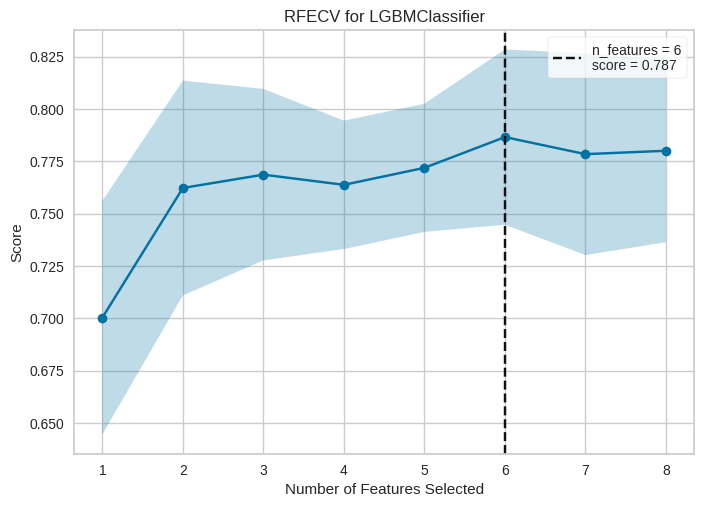

In [ ]:
plot_model(tuned_lightgbm, 'rfe')

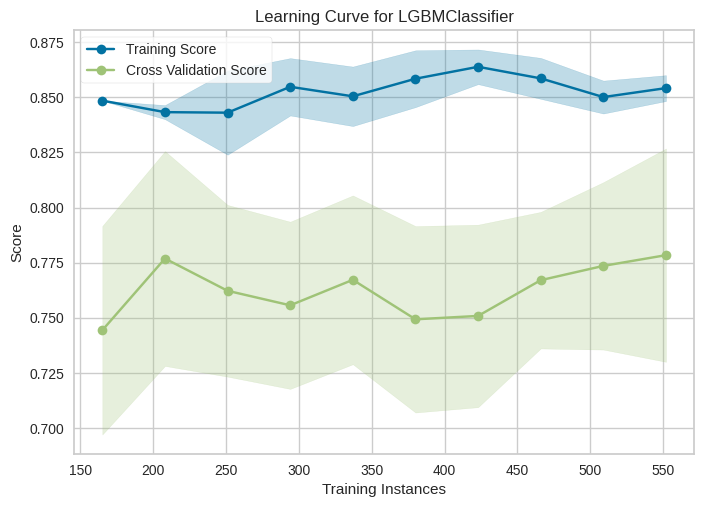

In [ ]:
plot_model(tuned_lightgbm, 'learning')

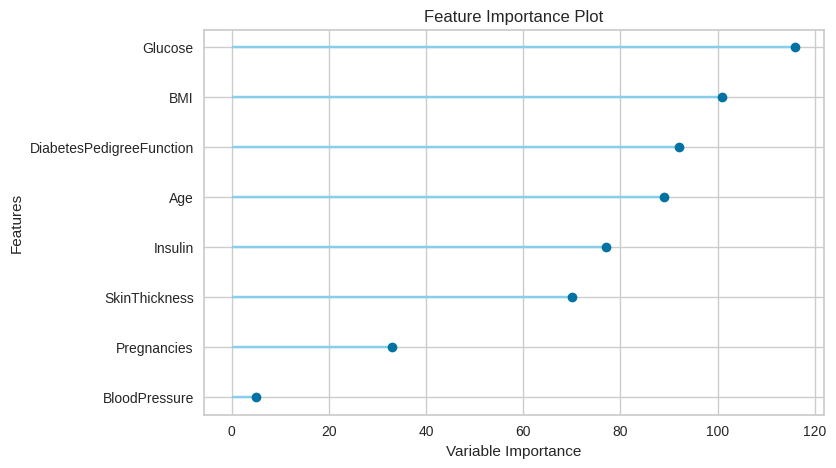

In [ ]:
plot_model(tuned_lightgbm, 'feature')

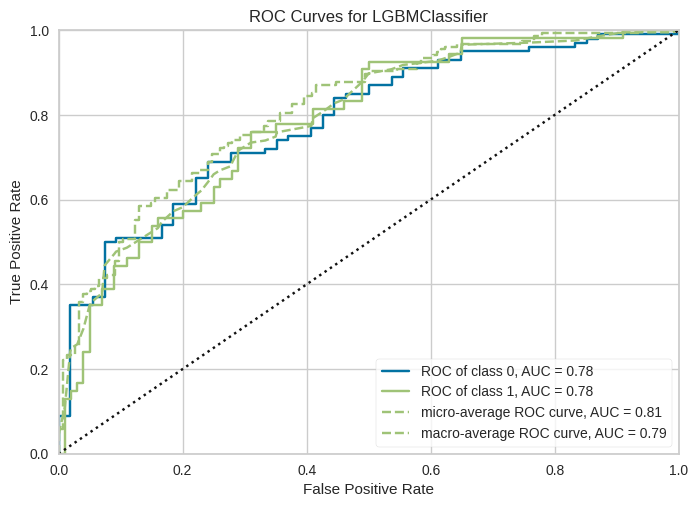

In [ ]:
plot_model(tuned_lightgbm,'auc')

In [ ]:
plot_model(tuned_lightgbm, 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.05
max_depth,-1
min_child_samples,41
min_child_weight,0.001
min_split_gain,0.7
n_estimators,180


In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 9. Model Predictions<a name = 9></a>

In [ ]:
predictions = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7273,0.7831,0.5556,0.6250,0.5882,0.3854,0.3869


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


## 8. Save the Model<a name = 9></a>

In [ ]:
save_model(tuned_lightgbm, model_name='diabetes-lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                   